In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

In [2]:
digits = datasets.load_digits()

In [3]:
X = digits.data
y = digits.target

In [4]:
# 构建噪音数据
nosiy_digits = X + np.random.normal(0, 4, size=X.shape)

In [5]:
# 绘制手写图片
# 取手写数字为0的前十条样本数据
example_digits = nosiy_digits[y == 0, :][:10]

In [6]:
# 累加循环取手写数字为1到9的前十条样本数据
for num in range(1, 10):
    num_digits = nosiy_digits[y == num, :][:10]
    example_digits = np.vstack([example_digits, num_digits])

In [7]:
example_digits.shape

(100, 64)

In [8]:
def plot_digits(data):
    # 构建尺寸为10 X 10的画图区域，既每行10个图片，一共10行
    plt.figure(figsize=(10, 10))
    # 遍历加了噪音的手写数字数据
    for index, imageData in enumerate(data):
        # 每个图片尺寸为10 X 10个像素，第三个参数是每张图片的位置
        plt.subplot(10, 10, index + 1)
        # 将有64个元素的数组转换为8 X 8的矩阵，既8 X 8个像素的图片
        image = np.reshape(imageData, (8, 8))
        # 图片的ColorMap用灰度显示，为了能更好的观察
        plt.imshow(image, cmap = plt.cm.gray)
    
    plt.show()

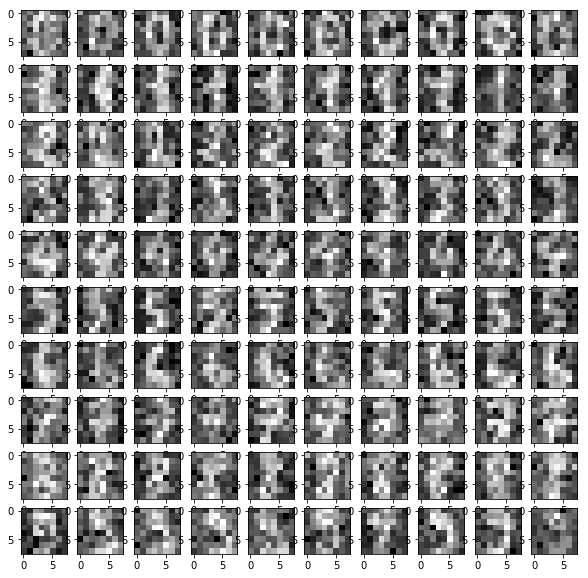

In [9]:
plot_digits(example_digits)

In [10]:
from sklearn.decomposition import PCA

In [11]:
pca = PCA(0.5)
pca.fit(nosiy_digits)

PCA(copy=True, iterated_power='auto', n_components=0.5, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [12]:
pca.n_components_

12

In [13]:
example_components = pca.transform(example_digits)

In [14]:
example_components.shape

(100, 12)

In [15]:
example_components_inverse = pca.inverse_transform(example_components)

In [16]:
example_components_inverse.shape

(100, 64)

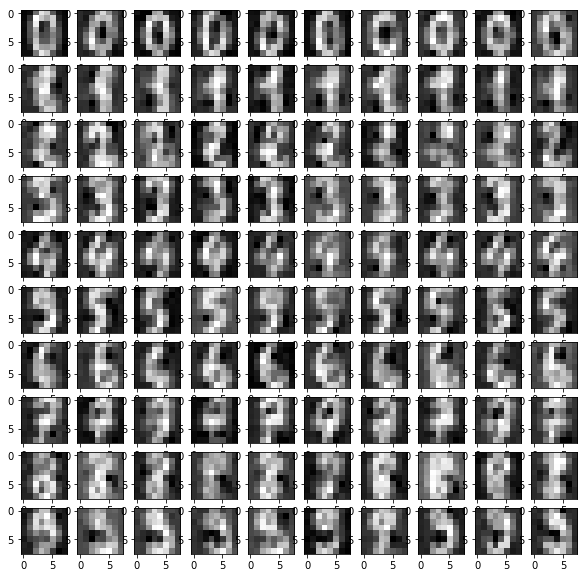

In [17]:
plot_digits(example_components_inverse)